<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 15: Scikit-Learn
### Notebook 5: Ensembles

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

import seaborn as sns ; sns.set()

In [2]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

Using TensorFlow backend.


In [3]:
def spiral_maker(number_of_arms, points_per_arm):
    inner_radius = 0.4
    outer_radius = 1.0
    arm_radius = (inner_radius + outer_radius)/2
    center_r = ((arm_radius*2)-inner_radius)/2
    samples = []
    labels = []
    for arm_number in range(number_of_arms):
        labels += [arm_number] * points_per_arm
        theta = (math.pi*2*arm_number)/number_of_arms
        center_x = center_r * math.cos(theta + math.pi)
        center_y = center_r * math.sin(theta + math.pi)
        for step in range(points_per_arm):
            alpha = 1.25*math.pi*step/points_per_arm
            point_x = center_x + (arm_radius * math.cos(alpha + theta))
            point_y = center_y + (arm_radius * math.sin(alpha + theta))
            samples.append([point_x, point_y])
    training_samples, test_samples, training_labels, test_labels = \
        train_test_split(samples, labels, test_size=0.33, random_state=42)

    return (np.array(training_samples), np.array(test_samples), training_labels, test_labels)

In [4]:
training_samples, test_samples, training_labels, test_labels = \
        spiral_maker(5, 200)
clrs = ['#C4435E', '#F8C58C', '#E57661', '#86DDB2', '#F8E7A2']

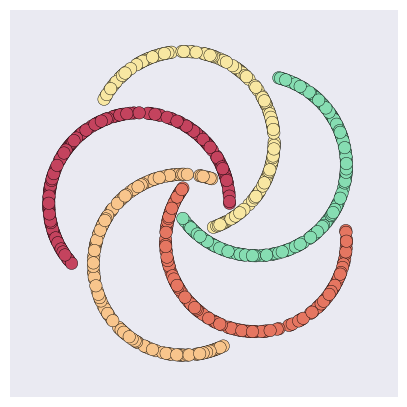

In [5]:
plt.figure(figsize=(5,5))
clr_list = [clrs[i] for i in training_labels]
plt.scatter(training_samples[:,0], training_samples[:,1], s=80, c=clr_list)
plt.xticks([],[])
plt.yticks([],[])
file_helper.save_figure('ensemble-starting-data')
plt.show()

In [6]:
def show_predictions(ensemble, filename):
    plt.figure(figsize=(8,3))
    ensemble.fit(training_samples, training_labels)
    predicted_classes = ensemble.predict(test_samples)
    
    clr_list = [clrs[i] for i in predicted_classes]
    custom_cmap = ListedColormap(clrs, name='custom_colormap')

    plt.subplot(1, 3, 1)
    plt.scatter(test_samples[:,0], test_samples[:,1], c=clr_list, s=80)
    plt.xticks([],[])
    plt.yticks([],[])
    
    plt.subplot(1, 3, 2)
    side_size = 400 
    xy_limit = 1.5
    x = np.linspace(-xy_limit, xy_limit, side_size) 
    y = np.linspace(-xy_limit, xy_limit, side_size) 
    X, Y = np.meshgrid(x, y) 
    xy_samples = [[px, py] for px in x for py in y]  
    predictions = ensemble.predict(xy_samples)
    predictions = predictions.reshape((side_size, side_size))
    predictions = predictions.T   # because pcolormesh wants transpose
    plt.pcolormesh(X, Y, predictions, cmap=custom_cmap) 
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xticks([],[])
    plt.yticks([],[])

    
    plt.subplot(1, 3, 3)
    side_size = 400 
    xy_limit = 1.5
    x = np.linspace(-xy_limit, xy_limit, side_size) 
    y = np.linspace(-xy_limit, xy_limit, side_size) 
    X, Y = np.meshgrid(x, y) 
    xy_samples = [[px, py] for px in x for py in y]  
    predictions = ensemble.predict(xy_samples)
    predictions = predictions.reshape((side_size, side_size))
    predictions = predictions.T   # because pcolormesh wants transpose
    plt.pcolormesh(X, Y, predictions, cmap=custom_cmap) 
    plt.scatter(test_samples[:,0], test_samples[:,1], facecolors='none', s=80, edgecolors='black', lw=0.5)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xticks([],[])
    plt.yticks([],[])

    plt.tight_layout()
    file_helper.save_figure(filename)
    plt.show()

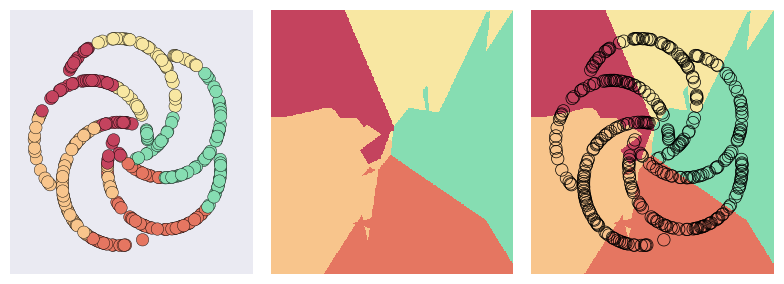

In [7]:
ridge_ensemble = AdaBoostClassifier(RidgeClassifier(), algorithm='SAMME')
show_predictions(ridge_ensemble, 'ensemble-ridge')

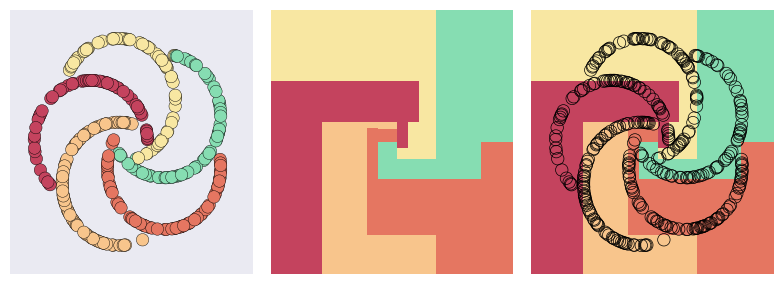

In [8]:
tree_ensemble = AdaBoostClassifier(DecisionTreeClassifier())
show_predictions(tree_ensemble, 'ensemble-tree')